In [1]:
# PCA plots for CRUK esophgeal atlas using pseudobulks.

In [1]:
library(tidyverse)
library(ggrepel)
library(repr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
dat <- read.csv('atlas/atlas_adatas_june2021_final_obs.csv')

In [3]:
log2p <- function(x) { log2(x+1) }

In [35]:
## options(repr.plot.width=10, repr.plot.height=8)

epi_pseudo = readr::read_csv('pseudobulks/pseudobulks_cluster_level/epithelial_pseudobulk.csv')
epi_meta = read_csv('pseudobulks/pseudobulks_cluster_level/epithelial_metadata.csv')

epi_counts <- epi_pseudo %>% 
  dplyr::select( -c(index, id)) %>%
    mutate_if(is.numeric, log2p) %>%
  dplyr::filter_all(all_vars(. > 0)) # %>%
#  dplyr::filter_all(all_vars(. < 20))

epi_var_ord <- order(apply(epi_counts, 1, var), decreasing = F)

epi_counts <- epi_counts[epi_var_ord[1:200], ]

print(dim(epi_counts))

epi_sub_pca <- prcomp(epi_counts, center = TRUE, scale = TRUE)

df <- cbind(epi_sub_pca$rotation, epi_meta)



Rows: 35606 Columns: 58

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): index, id
dbl (56): E12D, E07B, E08D, E11B, E07D2, E07C, E11C, E17D, E07A, E12A, E19C,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...1

Rows: 56 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient, biosample, dx, binned_cell_counts
dbl (2): ...1, cell_counts


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] 200  56


In [36]:
dim(epi_pseudo)

[1] 35606    58

In [37]:
df['E07A','dx'] <- 'NS'

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”


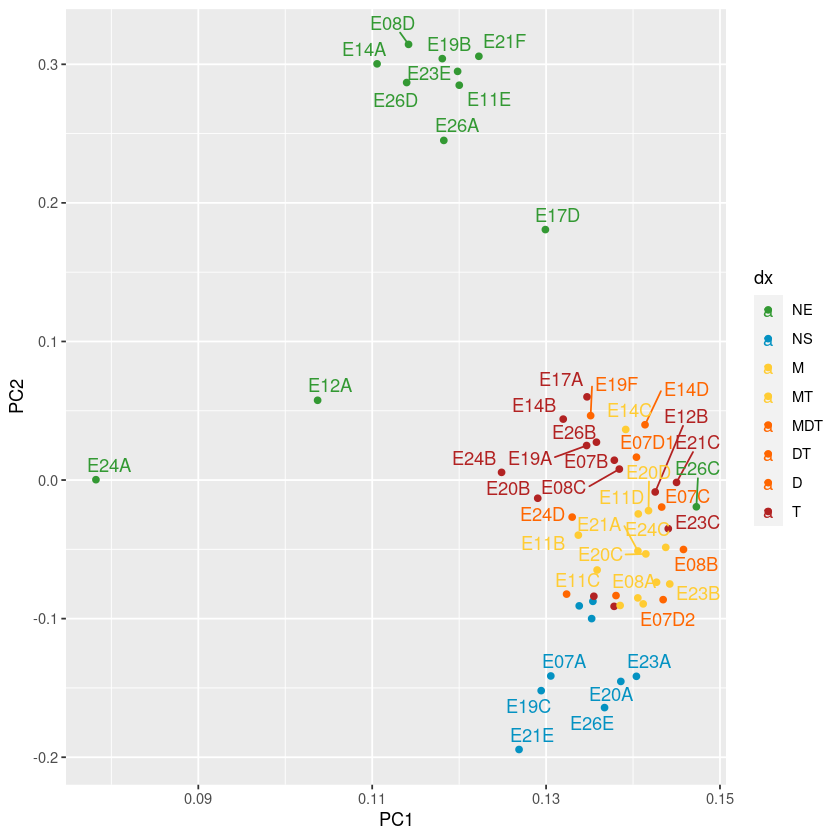

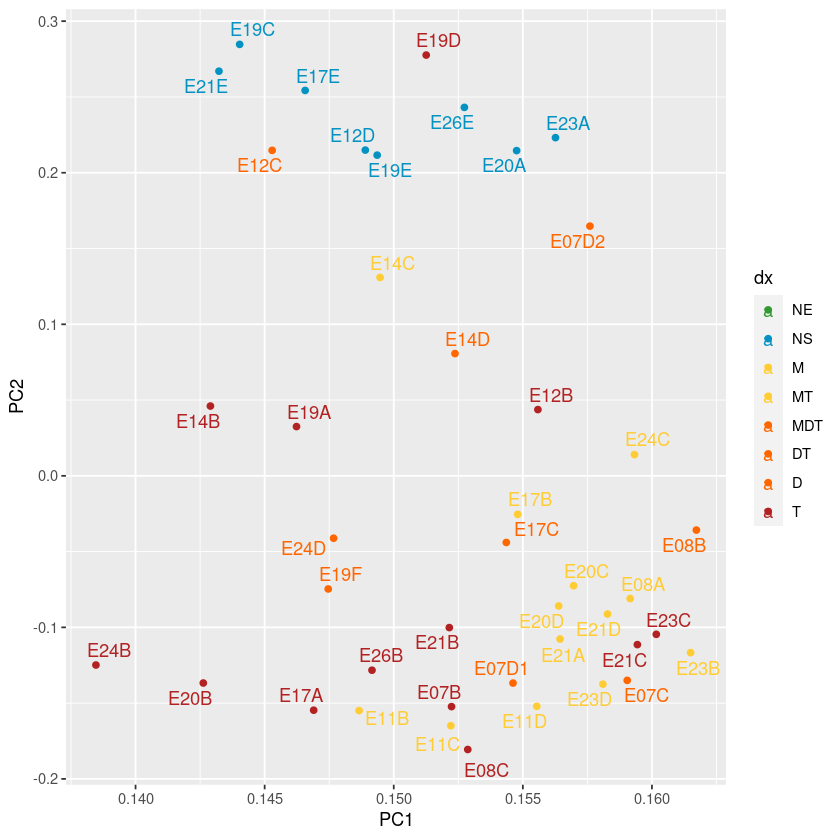

In [38]:


ggplot(data = df,
       aes(x = PC1, y = PC2, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 

epi_counts_noNE <- epi_counts[, (which(epi_meta$dx != 'NE'))]

epi_sub_pcanoNE <- prcomp(epi_counts_noNE, center = TRUE, scale = TRUE)

dfnoNE <- cbind(epi_sub_pcanoNE$rotation, epi_meta[ epi_meta$dx != 'NE', ])

ggplot(data = dfnoNE,
       aes(x = PC1, y = PC2, label=dfnoNE$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 

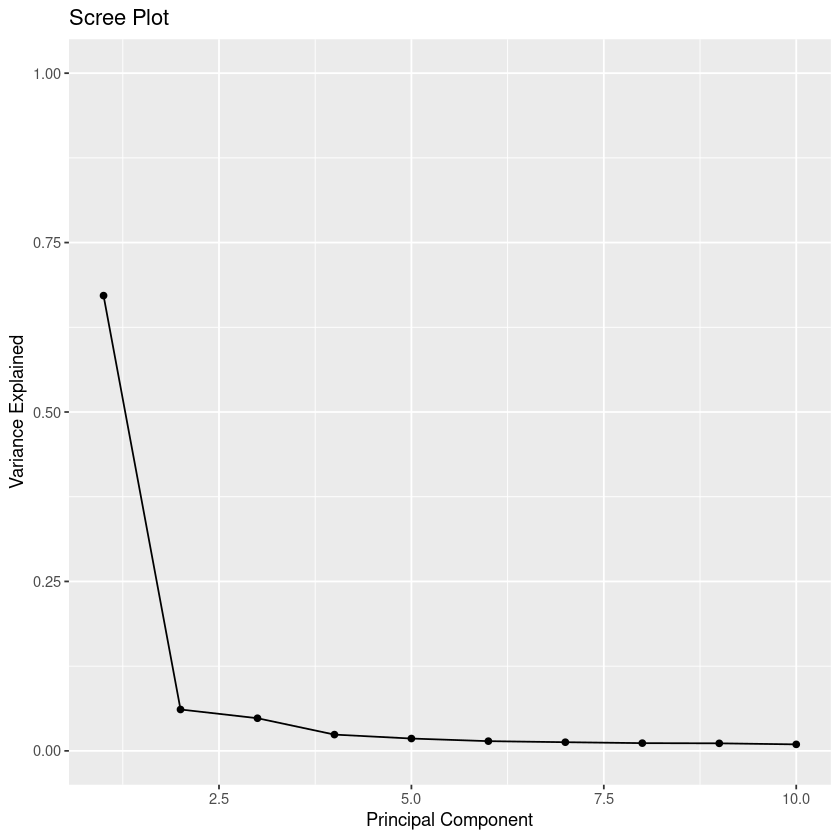

In [39]:
#epi_sub_pca
#https://www.statology.org/principal-components-analysis-in-r/

#calculate total variance explained by each principal component
var_explained = epi_sub_pca$sdev^2 / sum(epi_sub_pca$sdev^2)

#create scree plot
qplot(c(1:10), var_explained[1:10]) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

In [40]:
sum(var_explained[1:3])

[1] 0.7809242

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


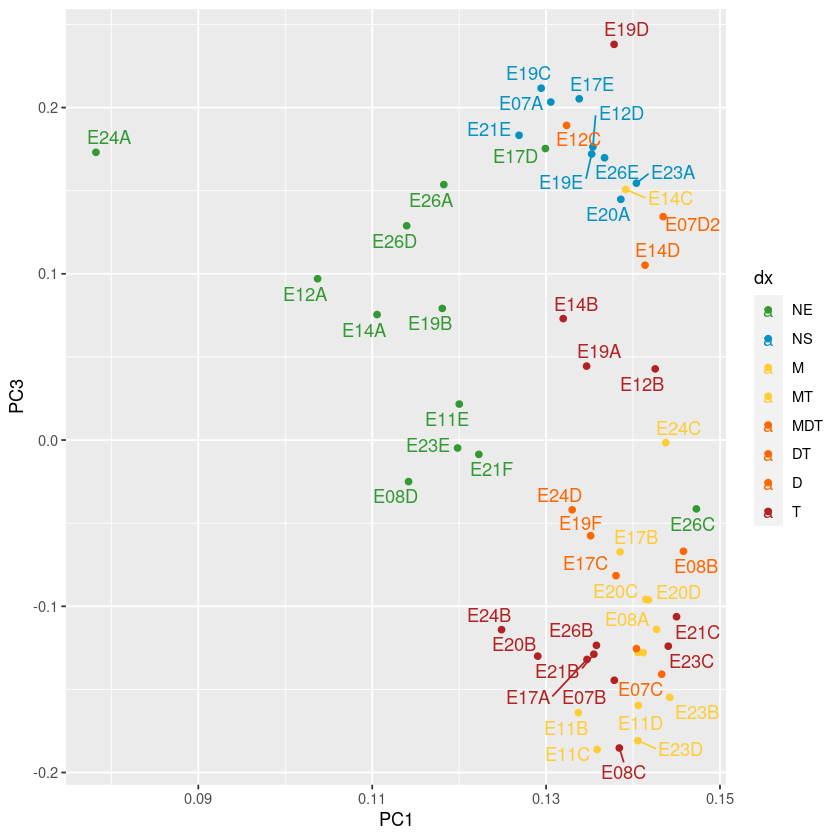

In [17]:

ggplot(data = df,
       aes(x = PC1, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”


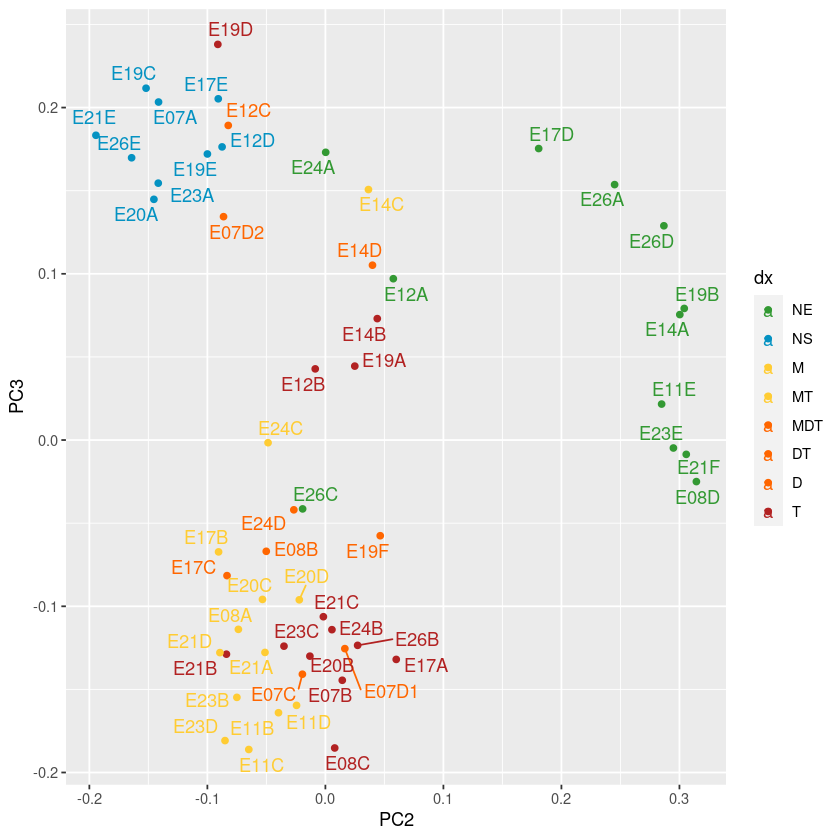

In [41]:

ggplot(data = df,
       aes(x = PC2, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



Rows: 35606 Columns: 58

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): index, id
dbl (56): E12D, E07B, E08D, E11B, E07D2, E07C, E11C, E17D, E07A, E12A, E19C,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...1

Rows: 56 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient, biosample, dx, binned_cell_counts
dbl (2): ...1, cell_counts


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] 200  56


Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”


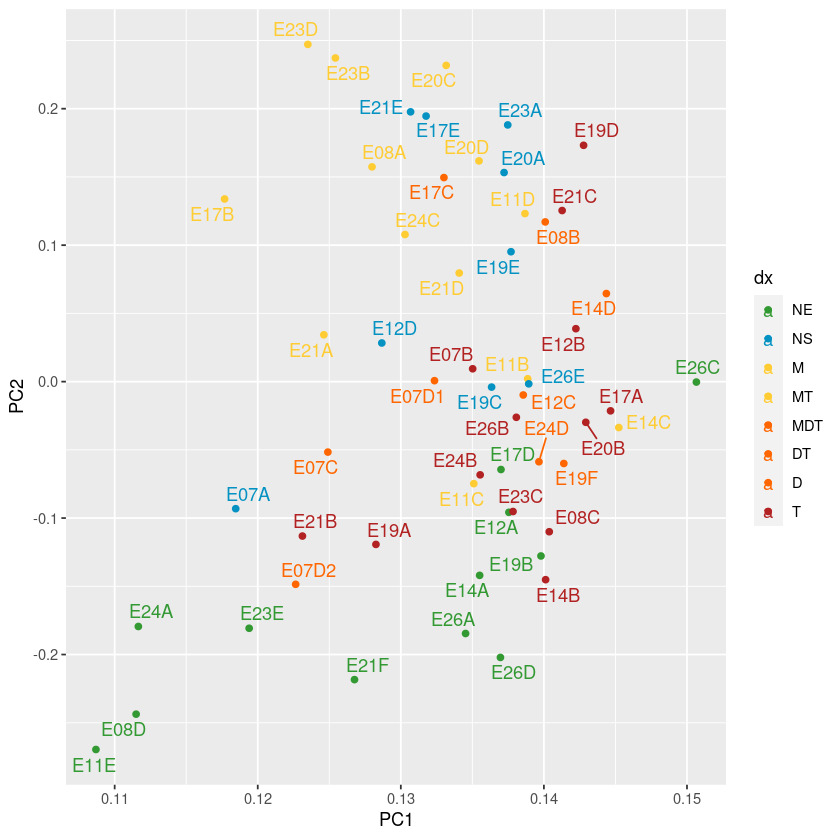

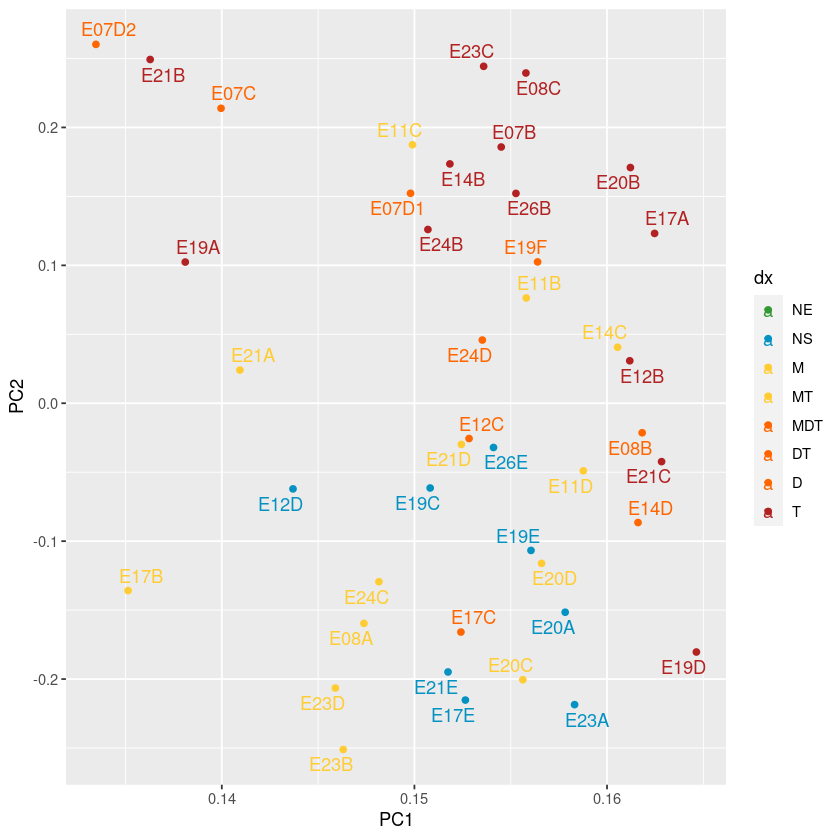

In [19]:
## options(repr.plot.width=10, repr.plot.height=8)


pseudo = readr::read_csv('pseudobulks/pseudobulks_cluster_level/stromal_pseudobulk.csv')
meta = read_csv('pseudobulks/pseudobulks_cluster_level/stromal_metadata.csv')


counts <- pseudo %>% 
  dplyr::select( -c(index, id)) %>%
    mutate_if(is.numeric, log2p) %>%
  dplyr::filter_all(all_vars(. > 0))  %>%
  dplyr::filter_all(all_vars(. < 2000))

var_ord <- order(apply(counts, 1, var), decreasing = F)

counts <- counts[var_ord[1:200], ]

print(dim(counts))

sub_pca <- prcomp(counts, center = TRUE, scale = TRUE)

df <- cbind(sub_pca$rotation, meta)

df['E07A','dx'] <- 'NS'

ggplot(data = df,
       aes(x = PC1, y = PC2, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 

counts_noNE <- counts[, (which(meta$dx != 'NE'))]

sub_pcanoNE <- prcomp(counts_noNE, center = TRUE, scale = TRUE)

dfnoNE <- cbind(sub_pcanoNE$rotation, meta[ meta$dx != 'NE', ])

ggplot(data = dfnoNE,
       aes(x = PC1, y = PC2, label=dfnoNE$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”


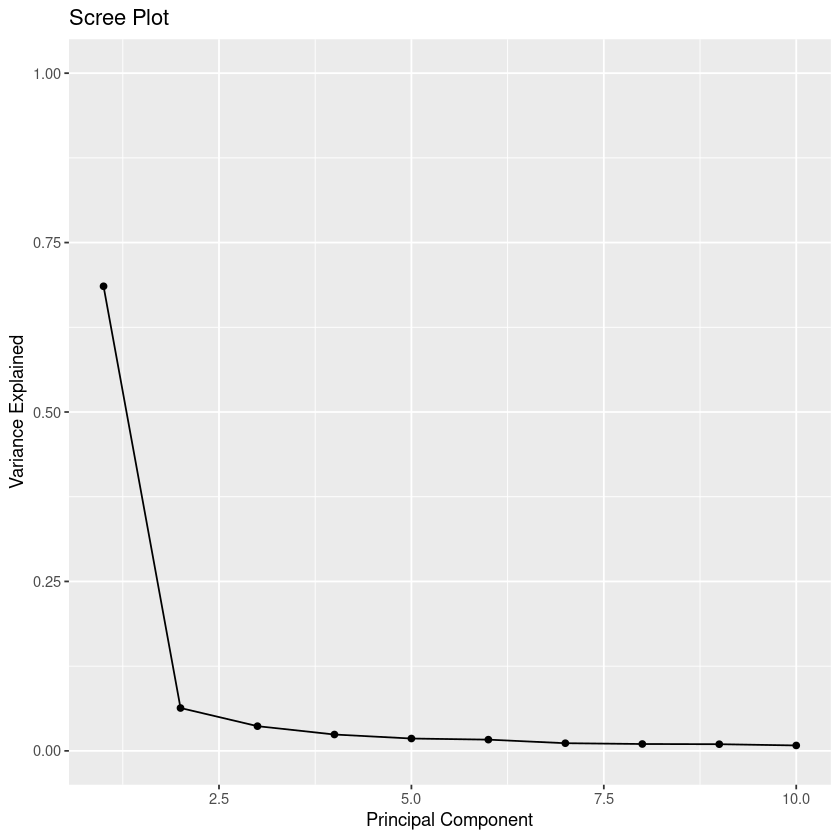

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”


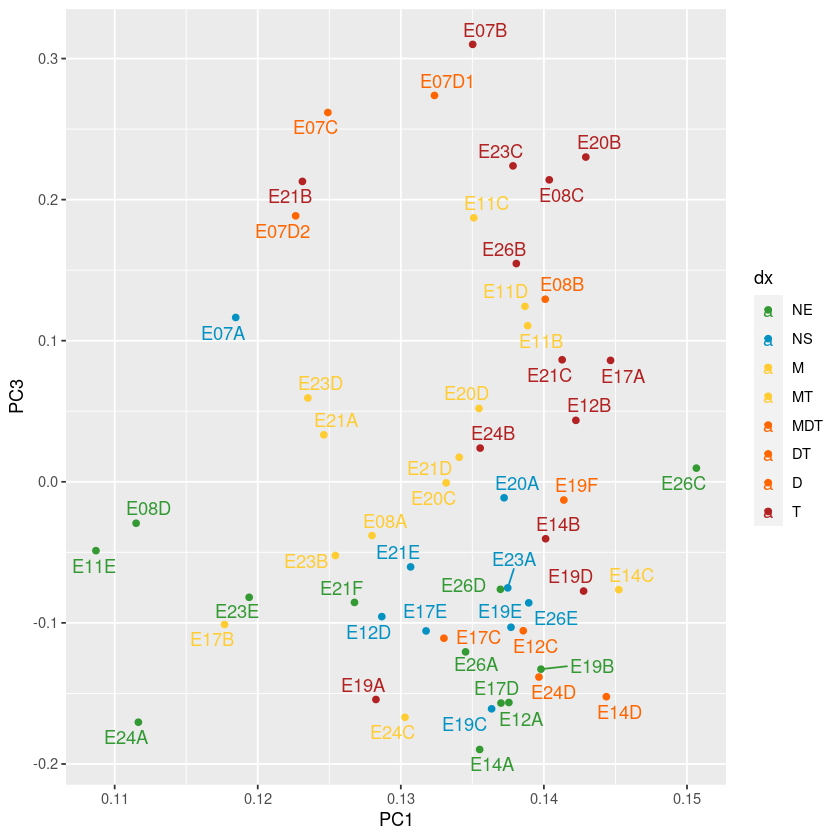

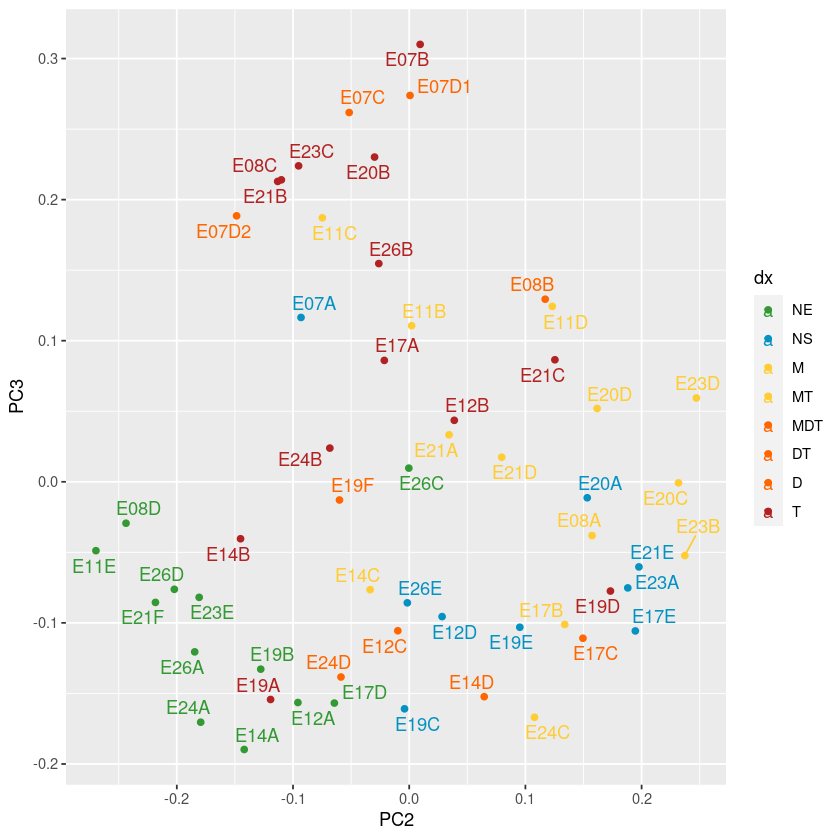

In [20]:

#calculate total variance explained by each principal component
var_explained = sub_pca$sdev^2 / sum(sub_pca$sdev^2)

#create scree plot
qplot(c(1:10), var_explained[1:10]) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)


ggplot(data = df,
       aes(x = PC1, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



ggplot(data = df,
       aes(x = PC2, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



Rows: 35606 Columns: 58

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): index, id
dbl (56): E12D, E07B, E08D, E11B, E07D2, E07C, E11C, E17D, E07A, E12A, E19C,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...1

Rows: 56 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient, biosample, dx, binned_cell_counts
dbl (2): ...1, cell_counts


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] 200  56


Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”


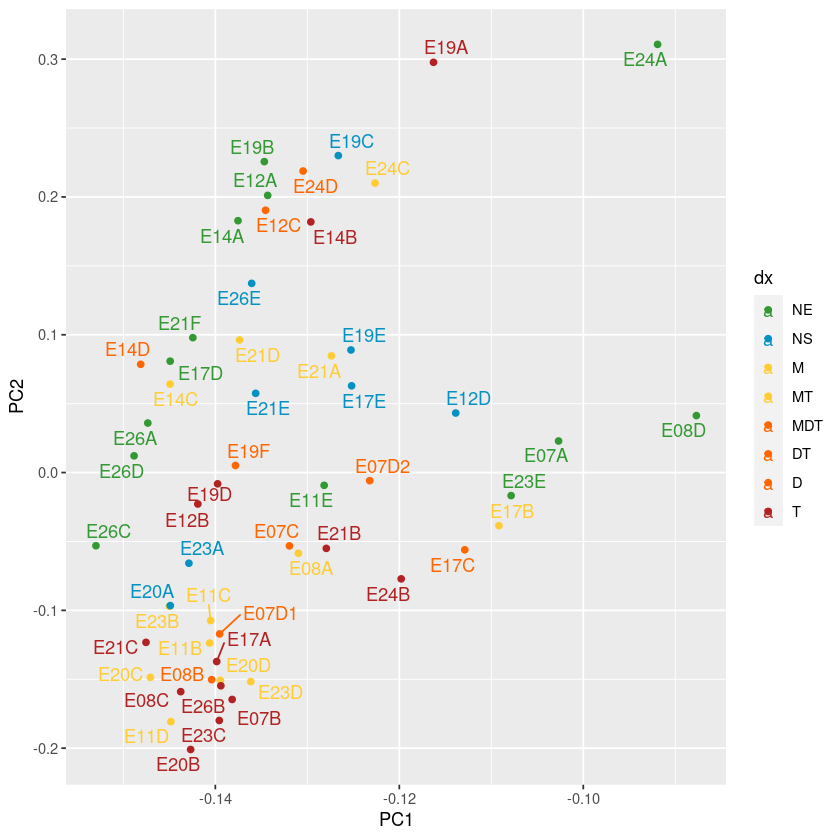

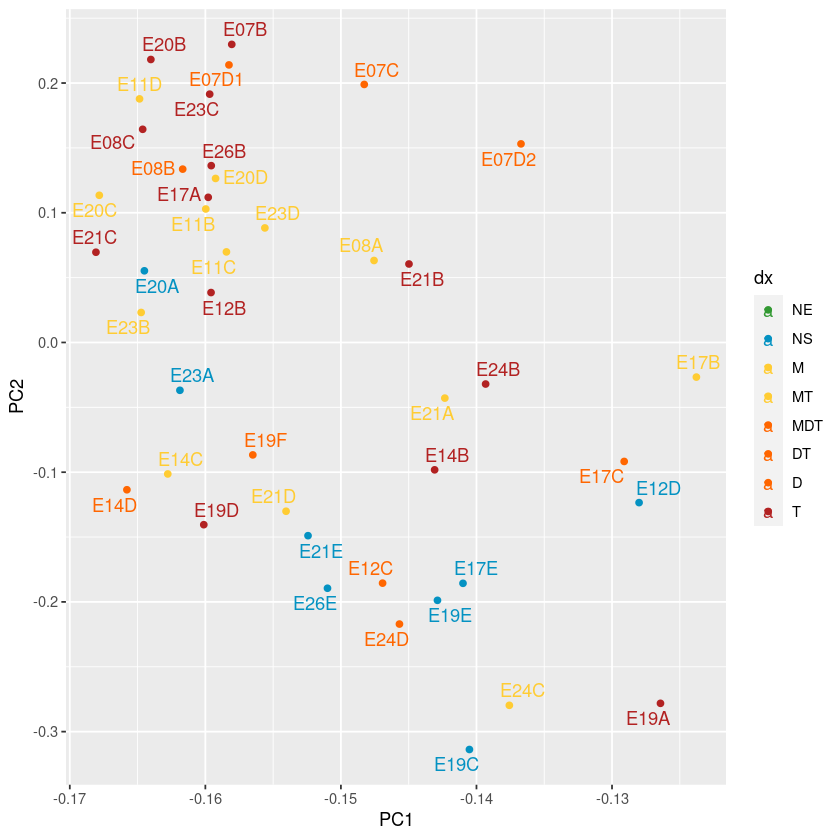

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


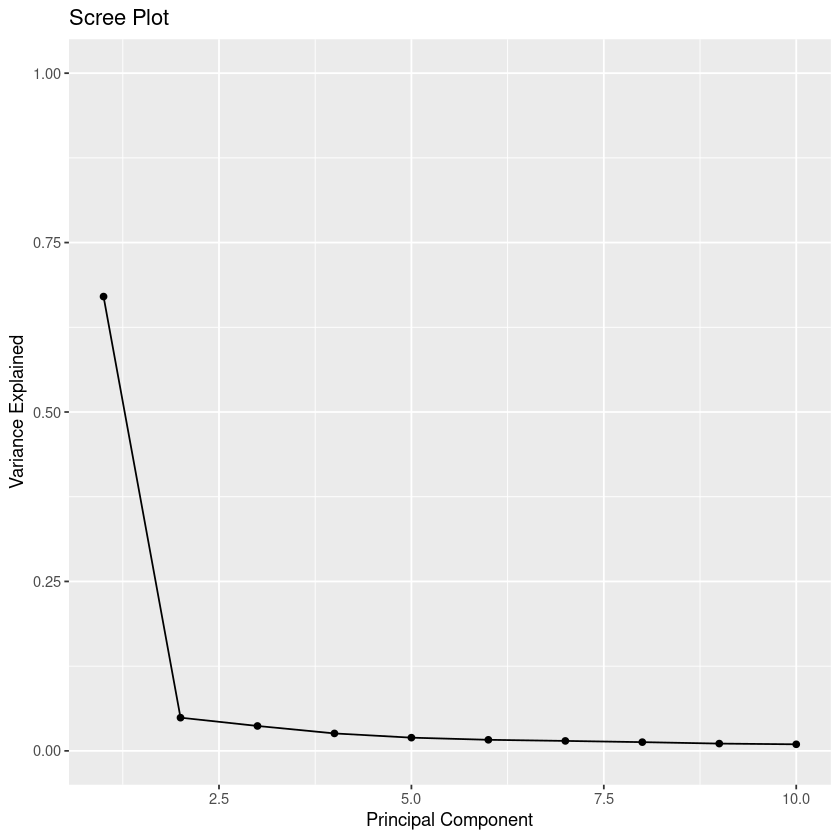

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”


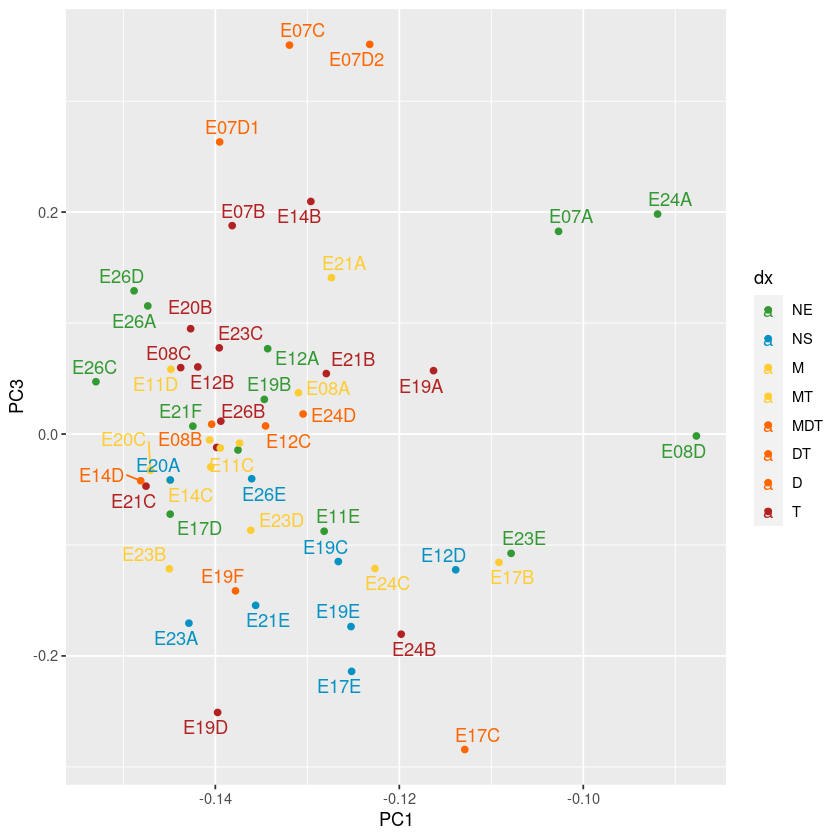

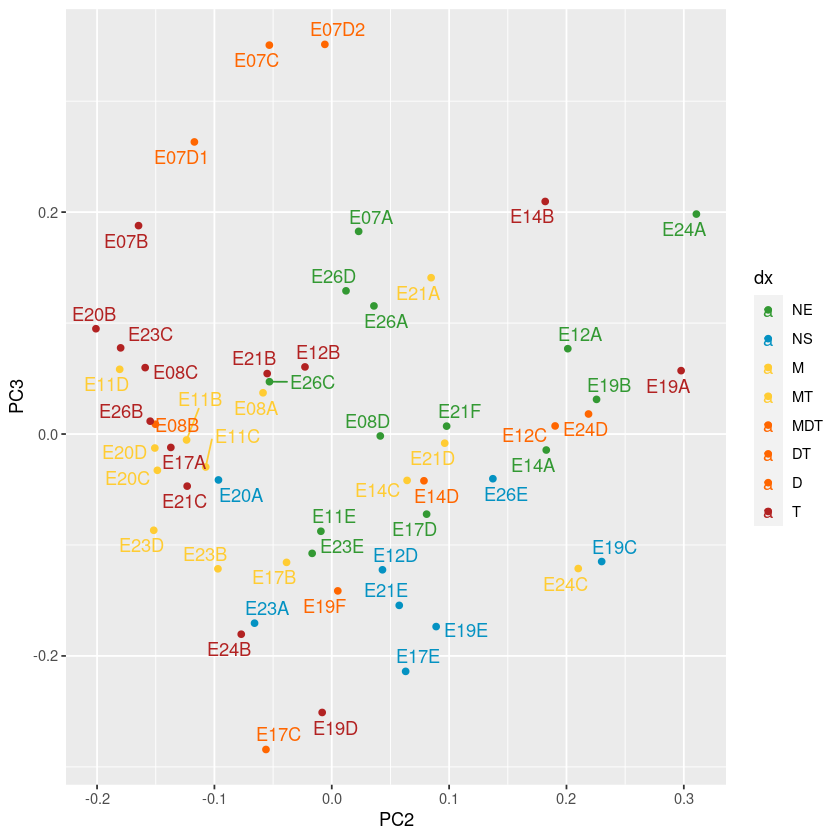

In [21]:
## options(repr.plot.width=10, repr.plot.height=8)

pseudo = readr::read_csv('pseudobulks/pseudobulks_cluster_level/fibroblasts_pseudobulk.csv')
meta = read_csv('pseudobulks/pseudobulks_cluster_level/fibroblasts_metadata.csv')

counts <- pseudo %>% 
  dplyr::select( -c(index, id)) %>%
    mutate_if(is.numeric, log2p) %>%
  dplyr::filter_all(all_vars(. > 0)) #%>%
  #dplyr::filter_all(all_vars(. < 2000))

var_ord <- order(apply(counts, 1, var), decreasing = F)

counts <- counts[var_ord[1:200], ]

print(dim(counts))

sub_pca <- prcomp(counts, center = TRUE, scale = TRUE)

df <- cbind(sub_pca$rotation, meta)


ggplot(data = df,
       aes(x = PC1, y = PC2, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 

counts_noNE <- counts[, (which(meta$dx != 'NE'))]

sub_pcanoNE <- prcomp(counts_noNE, center = TRUE, scale = TRUE)

dfnoNE <- cbind(sub_pcanoNE$rotation, meta[ meta$dx != 'NE', ])

ggplot(data = dfnoNE,
       aes(x = PC1, y = PC2, label=dfnoNE$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 


#calculate total variance explained by each principal component
var_explained = sub_pca$sdev^2 / sum(sub_pca$sdev^2)

#create scree plot
qplot(c(1:10), var_explained[1:10]) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)


ggplot(data = df,
       aes(x = PC1, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



ggplot(data = df,
       aes(x = PC2, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



Rows: 35606 Columns: 58

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): index, id
dbl (56): E12D, E07B, E08D, E11B, E07D2, E07C, E11C, E17D, E07A, E12A, E19C,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...1

Rows: 56 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient, biosample, dx, binned_cell_counts
dbl (2): ...1, cell_counts


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] 200  56


Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”


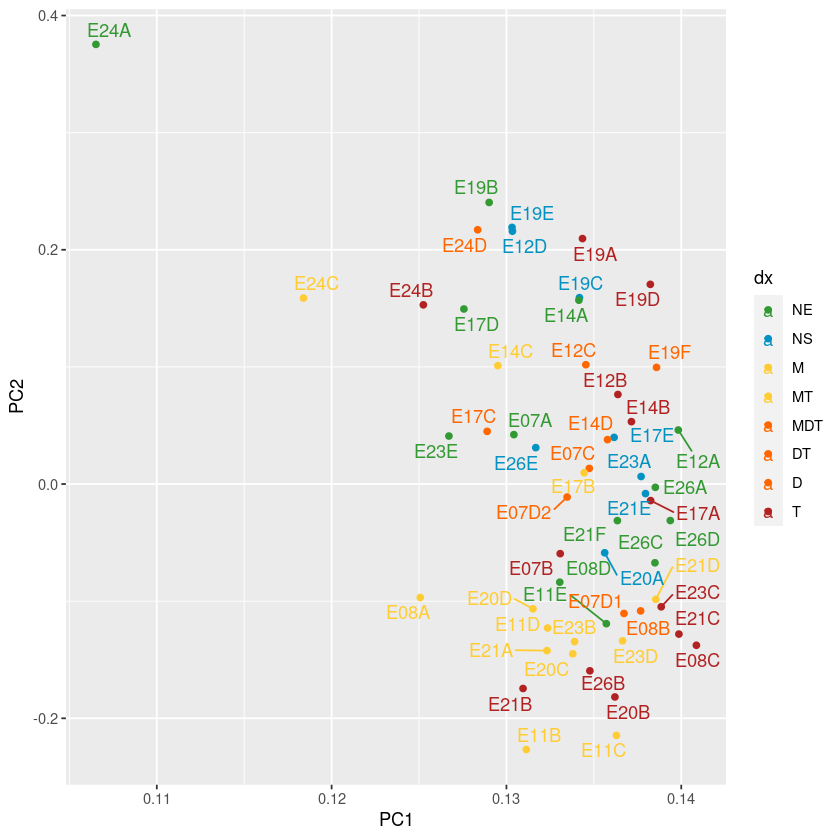

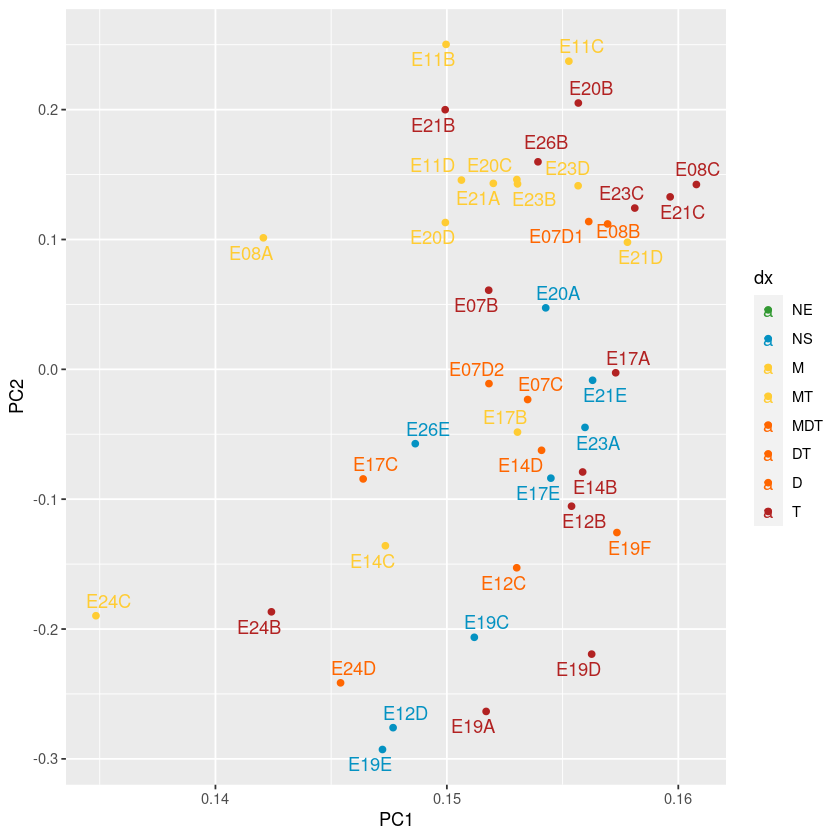

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”


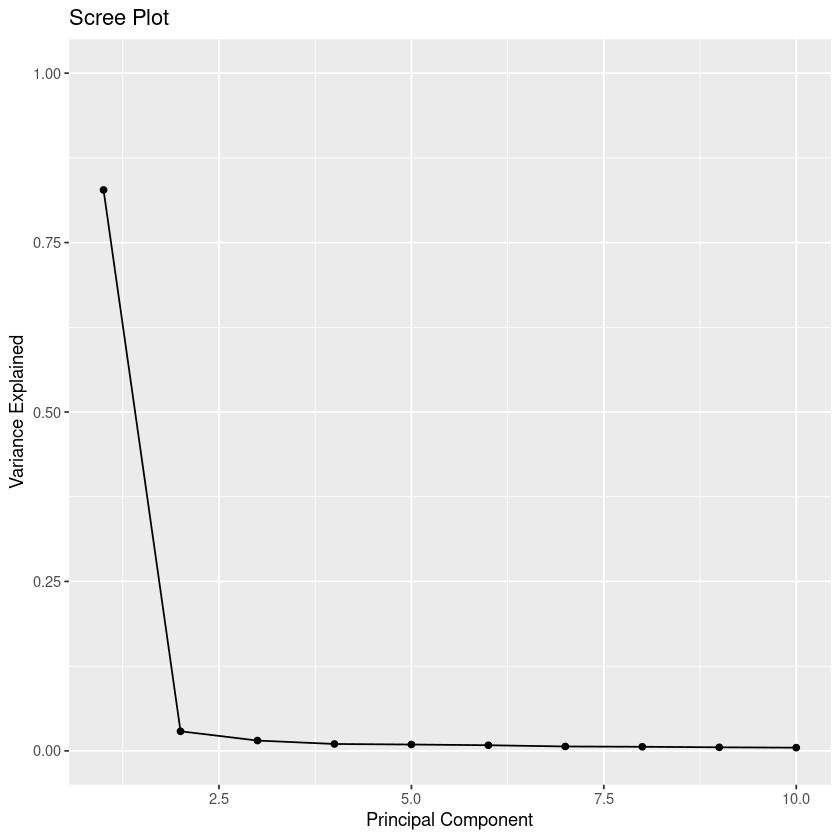

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”


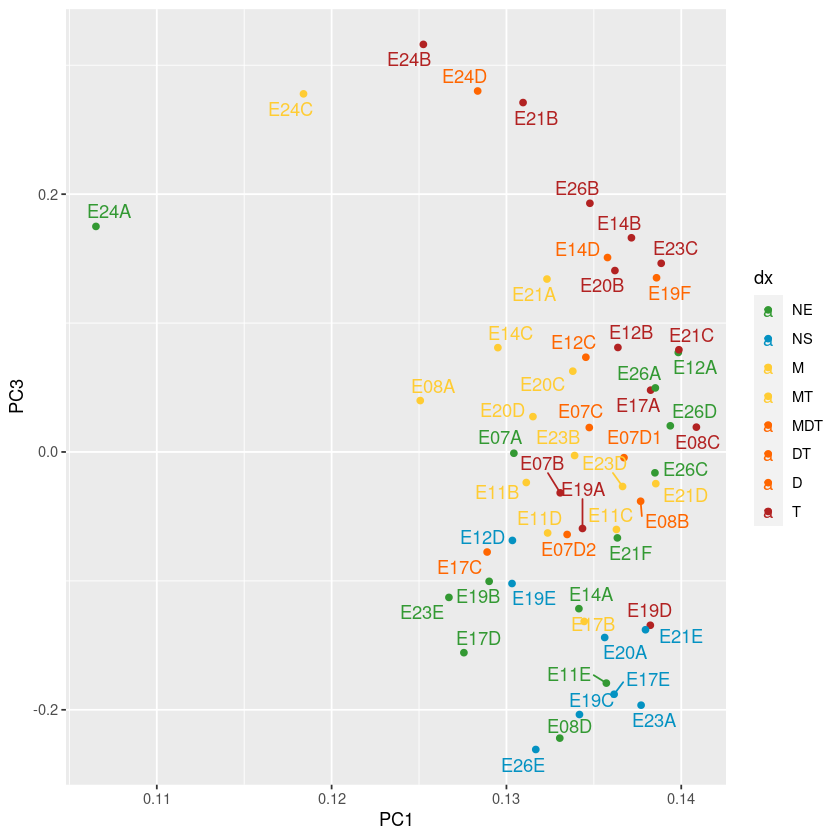

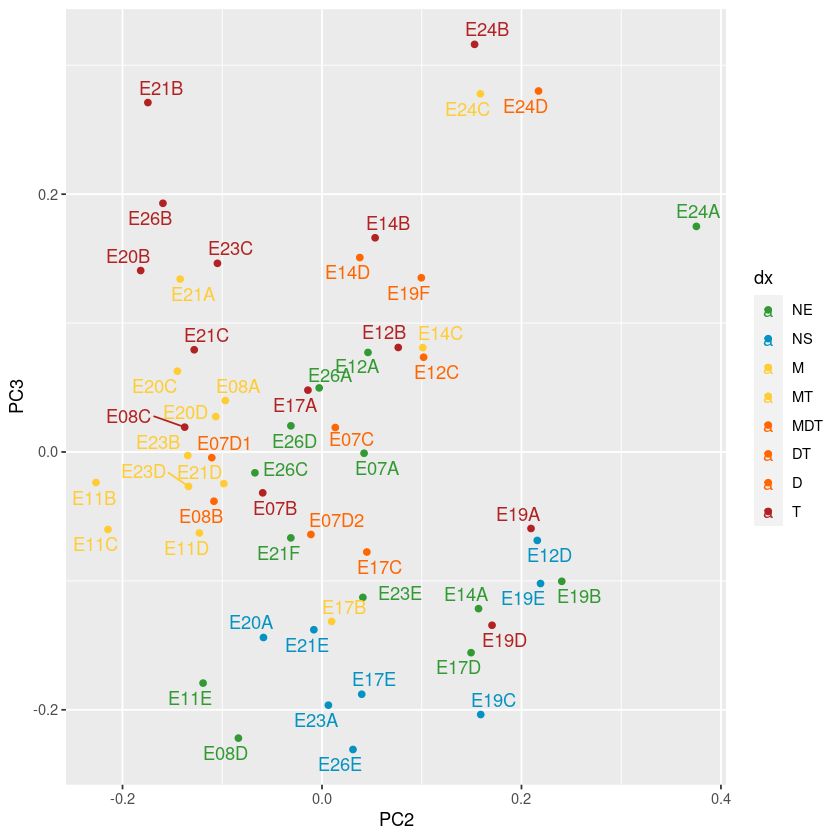

In [42]:
## options(repr.plot.width=10, repr.plot.height=8)

pseudo = readr::read_csv('pseudobulks/pseudobulks_cluster_level/cd8_Tcells_pseudobulk.csv')
meta = read_csv('pseudobulks/pseudobulks_cluster_level/cd8_Tcells_metadata.csv')

counts <- pseudo %>% 
  dplyr::select( -c(index, id)) %>%
    mutate_if(is.numeric, log2p) %>%
  dplyr::filter_all(all_vars(. > 0)) #%>%
  #dplyr::filter_all(all_vars(. < 2000))

var_ord <- order(apply(counts, 1, var), decreasing = F)

counts <- counts[var_ord[1:200], ]

print(dim(counts))

sub_pca <- prcomp(counts, center = TRUE, scale = TRUE)

df <- cbind(sub_pca$rotation, meta)


ggplot(data = df,
       aes(x = PC1, y = PC2, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 

counts_noNE <- counts[, (which(meta$dx != 'NE'))]

sub_pcanoNE <- prcomp(counts_noNE, center = TRUE, scale = TRUE)

dfnoNE <- cbind(sub_pcanoNE$rotation, meta[ meta$dx != 'NE', ])

ggplot(data = dfnoNE,
       aes(x = PC1, y = PC2, label=dfnoNE$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 


#calculate total variance explained by each principal component
var_explained = sub_pca$sdev^2 / sum(sub_pca$sdev^2)

#create scree plot
qplot(c(1:10), var_explained[1:10]) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)


ggplot(data = df,
       aes(x = PC1, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



ggplot(data = df,
       aes(x = PC2, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



In [22]:
all(meta$biosample == colnames(counts))


[1] TRUE

Rows: 35606 Columns: 58

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): index, id
dbl (56): E12D, E07B, E08D, E11B, E07D2, E07C, E11C, E17D, E07A, E12A, E19C,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...1

Rows: 56 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient, biosample, dx, binned_cell_counts
dbl (2): ...1, cell_counts


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] 200  56


Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”


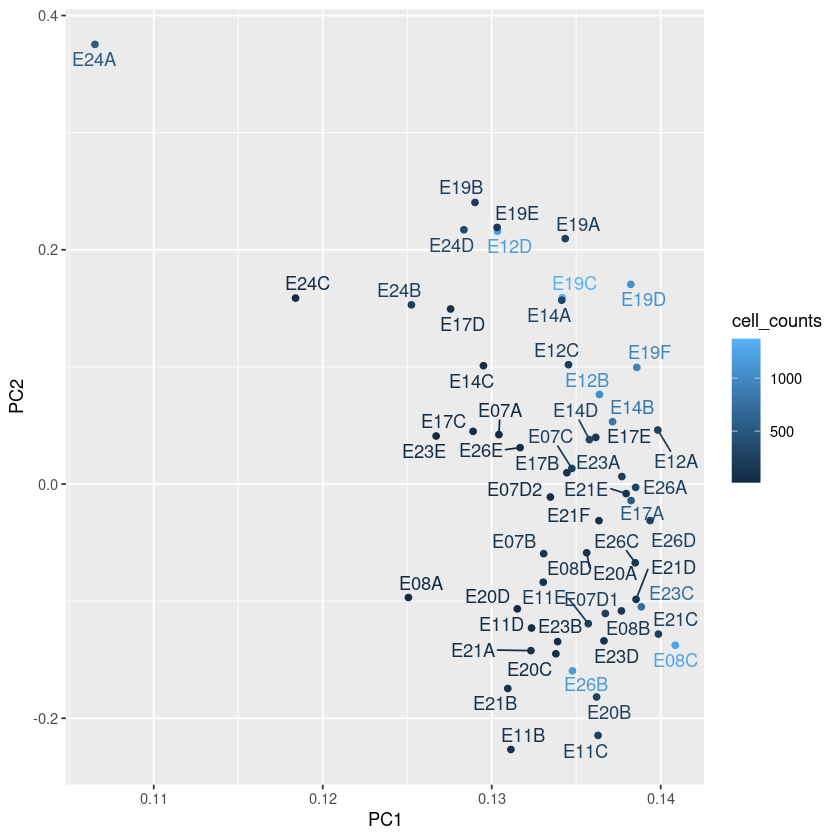

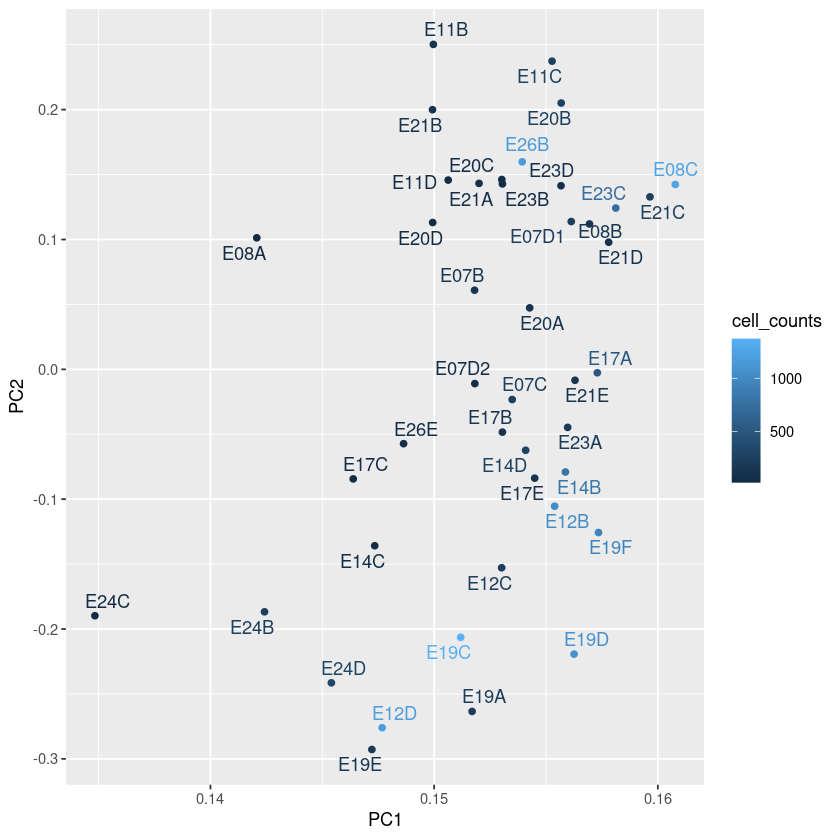

In [23]:
## options(repr.plot.width=10, repr.plot.height=8)

pseudo = readr::read_csv('pseudobulks/pseudobulks_cluster_level/cd8_Tcells_pseudobulk.csv')
meta = read_csv('pseudobulks/pseudobulks_cluster_level/cd8_Tcells_metadata.csv')

counts <- pseudo %>% 
  dplyr::select( -c(index, id)) %>%
    mutate_if(is.numeric, log2p) %>%
  dplyr::filter_all(all_vars(. > 0))  #%>%
#  dplyr::filter_all(all_vars(. < 2000))

var_ord <- order(apply(counts, 1, var), decreasing = F)

counts <- counts[var_ord[1:200], ]

print(dim(counts))

sub_pca <- prcomp(counts, center = TRUE, scale = TRUE)

df <- cbind(sub_pca$rotation, meta)
df_cd8 <- df

ggplot(data = df,
       aes(x = PC1, y = PC2, label=df$biosample, color=cell_counts)) + 
       geom_point() +
       geom_text_repel() 

counts_noNE <- counts[, (which(meta$dx != 'NE'))]

sub_pcanoNE <- prcomp(counts_noNE, center = TRUE, scale = TRUE)

dfnoNE <- cbind(sub_pcanoNE$rotation, meta[ meta$dx != 'NE', ])

ggplot(data = dfnoNE,
       aes(x = PC1, y = PC2, label=dfnoNE$biosample, color=cell_counts)) + 
       geom_point() +
       geom_text_repel() 


Rows: 35606 Columns: 58

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): index, id
dbl (56): E12D, E07B, E08D, E11B, E07D2, E07C, E11C, E17D, E07A, E12A, E19C,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...1

Rows: 56 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient, biosample, dx, binned_cell_counts
dbl (2): ...1, cell_counts


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] 200  56


Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `dfnoNE$biosample` is discouraged. Use `biosample` instead.”


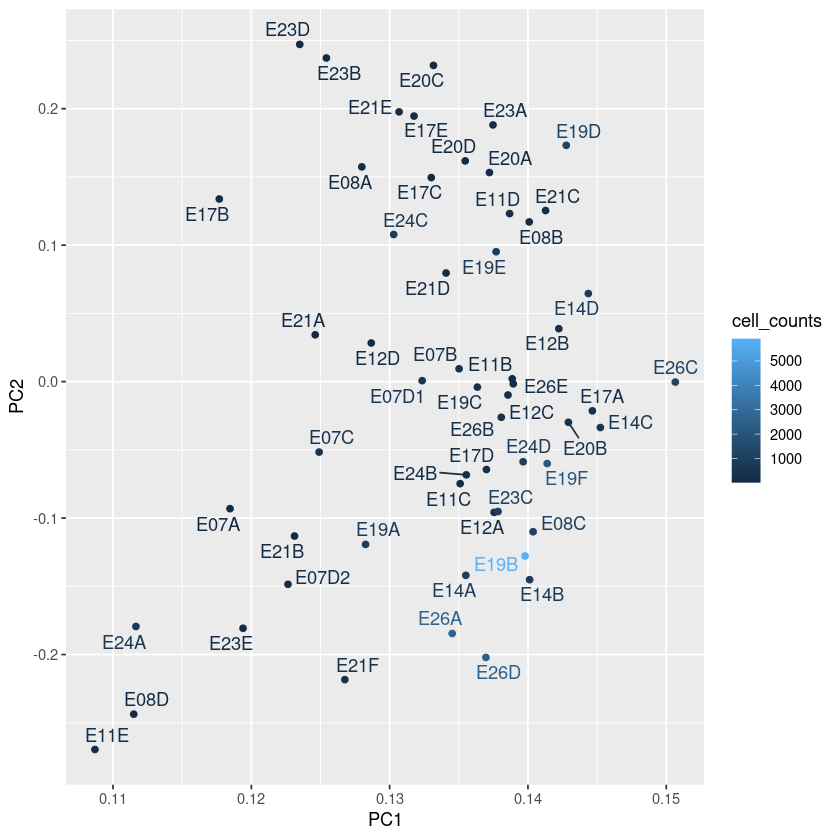

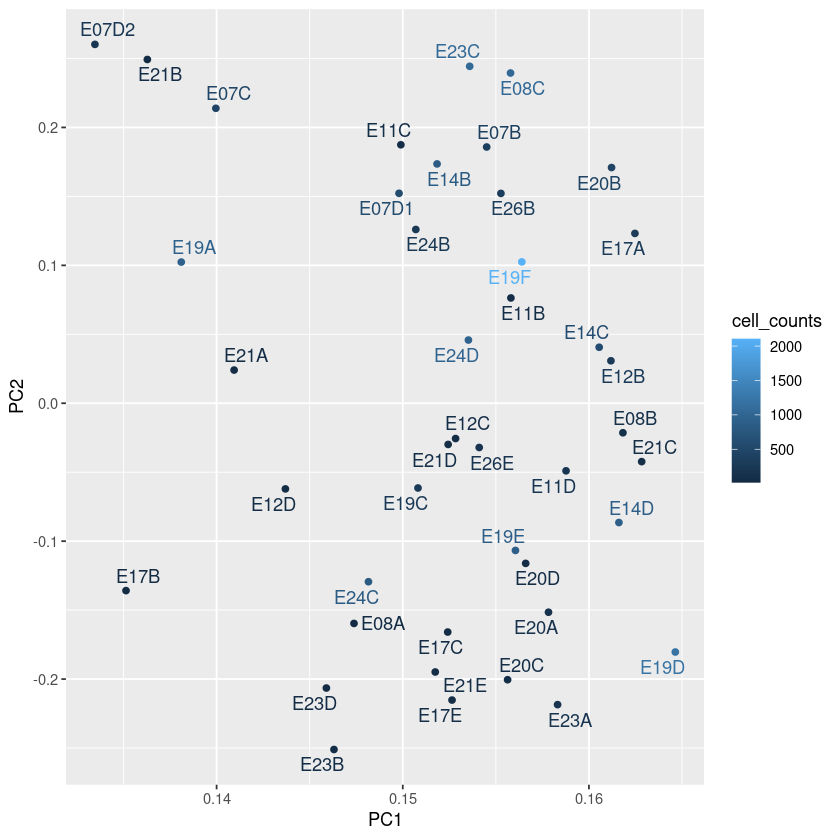

In [24]:
## options(repr.plot.width=10, repr.plot.height=8)

pseudo = readr::read_csv('pseudobulks/pseudobulks_cluster_level/stromal_pseudobulk.csv')
meta = read_csv('pseudobulks/pseudobulks_cluster_level/stromal_metadata.csv')

counts <- pseudo %>% 
  dplyr::select( -c(index, id)) %>%
    mutate_if(is.numeric, log2p) %>%
  dplyr::filter_all(all_vars(. > 0))  #%>%
#  dplyr::filter_all(all_vars(. < 2000))

var_ord <- order(apply(counts, 1, var), decreasing = F)

counts <- counts[var_ord[1:200], ]

print(dim(counts))

sub_pca <- prcomp(counts, center = TRUE, scale = TRUE)


df <- cbind(sub_pca$rotation, meta)
stromal_df <- df

ggplot(data = df,
       aes(x = PC1, y = PC2, label=df$biosample, color=cell_counts)) + 
       geom_point() +
       geom_text_repel() 

counts_noNE <- counts[, (which(meta$dx != 'NE'))]

sub_pcanoNE <- prcomp(counts_noNE, center = TRUE, scale = TRUE)

dfnoNE <- cbind(sub_pcanoNE$rotation, meta[ meta$dx != 'NE', ])

dfnoNE$cell_counts_limit <- sapply(dfnoNE$cell_counts, function(a) if (a > 1000) {1000} else {a})

ggplot(data = dfnoNE,
       aes(x = PC1, y = PC2, label=dfnoNE$biosample, color=cell_counts)) + 
       geom_point() +
       geom_text_repel() 


In [25]:
head(meta)

...1,patient,biosample,dx,cell_counts,binned_cell_counts
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
0,E12,E12D,NS,52,"(40, 80]"
52,E07,E07B,T,369,"(160, 100000]"
421,E08,E08D,NE,100,"(80, 160]"
521,E11,E11B,MT,79,"(40, 80]"
600,E07,E07D2,D,206,"(160, 100000]"
806,E07,E07C,D,460,"(160, 100000]"


Rows: 35606 Columns: 51

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): index, id
dbl (49): E12D, E07B, E11B, E07D2, E07C, E11C, E17D, E07A, E19C, E12B, E19E,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...1

Rows: 49 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient, biosample, dx, binned_cell_counts
dbl (2): ...1, cell_counts


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 6 × 49
   E12D  E07B  E11B E07D2  E07C  E11C  E17D  E07A  E19C  E12B  E19E  E19D  E17E
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1  2     6.81  5.21  5.86  5.98  7.79  2.58  6.04  5.52  3.32  6.54  6.88  4.81
2  3.32  6.34  4.95  7.15  6.38  7.52  3.46  7.69  6.19  3.91  6.21  7.31  4.09
3  4.58  7.35  3.58  7.06  6.30  7.03  1     6.95  5.93  4.64  7.75  7.77  4.70
4  4.58  7.03  4.64  7.07  5.73  7.15  1.58  6.98  7.53  5.36  6.86  7.89  5.83
5  3.70  6.32  4.75  7.14  5.61  7.42  1.58  7.04  6.49  5.81  7.45  7.81  4.91
6  3.58  5.93  4.32  6.92  5.93  6.63  1     7.13  5.52  4     7     7.54  4.46
# … with 36 more variables: E14B <dbl>, E21B <dbl>, E19F <dbl>, E17C <dbl>,
#   E17A <dbl>, E19A <dbl>, E08B <dbl>, E21E <dbl>, E17B <dbl>, E23C <dbl>,
#   E14C <dbl>, E26A <dbl>, E23D <dbl>, E23B <dbl>, E21A <dbl>, E07D1 <dbl>,
#   E23A <dbl>, E21F <dbl>, E21D <dbl>, E21C <dbl>, E20C <dbl>, E20B <dbl>,
#   E20D <dbl>, E20A <dbl>, E24D <db

Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”


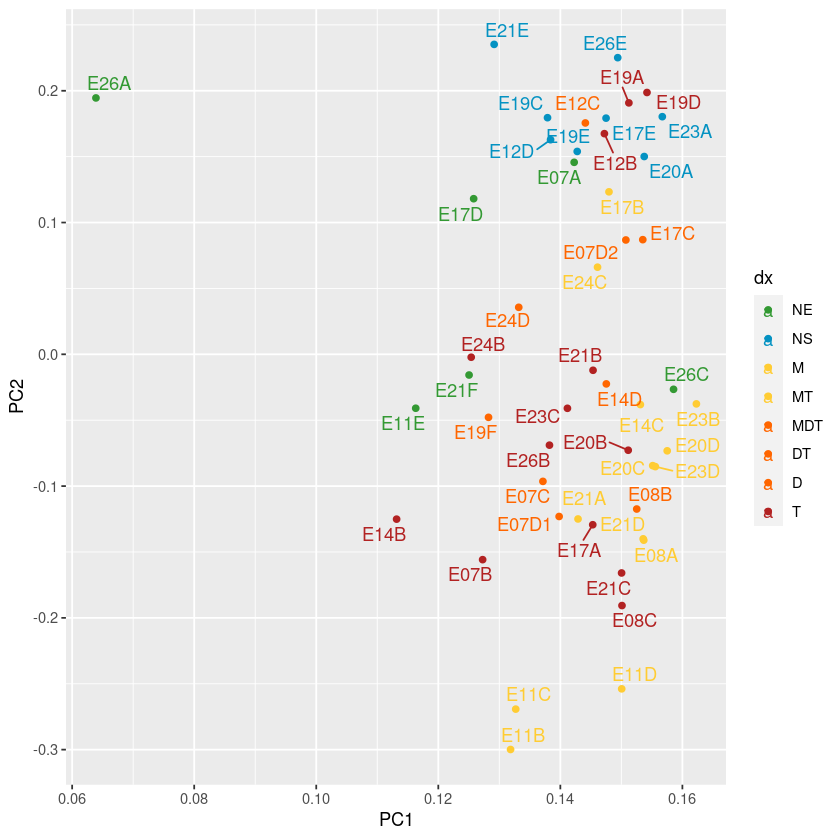

In [26]:
epi_pseudo = readr::read_csv('pseudobulks/pseudobulks_celltype_level/mucous cell of stomach_pseudobulk.csv')
epi_meta = read_csv('pseudobulks/pseudobulks_celltype_level/mucous cell of stomach_metadata.csv')

epi_counts <- epi_pseudo %>% 
  dplyr::select( -c(index, id)) %>%
  mutate_if(is.numeric, log2p) %>%
  dplyr::filter_all(all_vars(. > 0))  %>%
  na.omit()
#  dplyr::filter_all(all_vars(. < 20))

epi_var_ord <- order(apply(epi_counts, 1, var), decreasing = F)

epi_counts <- epi_counts[epi_var_ord[1:200], ]

print(head(epi_counts))
print(dim(epi_counts))

epi_sub_pca <- prcomp(epi_counts, center = TRUE, scale = TRUE)

df <- cbind(epi_sub_pca$rotation, epi_meta)

ggplot(data = df,
       aes(x = PC1, y = PC2, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 

In [27]:
colnames(stromal_df) <- as.character(sapply(colnames(stromal_df), function(a) paste0('stromal_',a)))


In [28]:
colnames(df_cd8) <- as.character(sapply(colnames(df_cd8), function(a) paste0('cd8_T_',a)))

In [29]:
df <- cbind(stromal_df, df_cd8)
head(df)

,stromal_PC1,stromal_PC2,stromal_PC3,stromal_PC4,stromal_PC5,stromal_PC6,stromal_PC7,stromal_PC8,stromal_PC9,stromal_PC10,⋯,cd8_T_PC53,cd8_T_PC54,cd8_T_PC55,cd8_T_PC56,cd8_T_...1,cd8_T_patient,cd8_T_biosample,cd8_T_dx,cd8_T_cell_counts,cd8_T_binned_cell_counts
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
E12D,0.1286707,0.028306656,-0.09555996,0.18848761,-0.16782964,0.18203705,0.19306214,-0.280641590,0.0773622349,-0.16363884,⋯,0.20046683,-0.294594347,-0.01246215,0.08802502,0,E12,E12D,NS,1194,"(160, 100000]"
E07B,0.1350215,0.009411698,0.31004133,-0.09828253,-0.04389842,0.01751131,-0.01046904,0.057887253,0.0008967926,0.01877392,⋯,-0.08532946,0.005911578,-0.05012935,-0.03595557,1194,E07,E07B,T,143,"(80, 160]"
E08D,0.1114987,-0.243707044,-0.02937199,0.24260753,0.11182757,0.23500650,-0.15195363,0.288286687,0.0318199007,0.09985969,⋯,0.16330706,-0.017363573,-0.14595582,-0.01555978,1337,E08,E08D,NE,102,"(80, 160]"
E11B,0.1388674,0.002084203,0.11066017,0.04355638,0.14216992,-0.15837621,-0.13810352,-0.150119177,-0.0298836706,-0.02049247,⋯,0.06692741,-0.106554557,-0.01224620,0.03944945,1439,E11,E11B,MT,107,"(80, 160]"
E07D2,0.1226503,-0.148544859,0.18851774,-0.01035953,-0.42739414,-0.05231693,0.09126052,-0.009042141,0.0110288347,-0.01549540,⋯,-0.06971423,0.027853789,-0.01497047,-0.02147599,1546,E07,E07D2,D,49,"(40, 80]"
E07C,0.1249011,-0.051646385,0.26176247,-0.12530181,-0.25042258,-0.17429667,-0.22026023,0.048216539,-0.0184172068,0.05199567,⋯,-0.06805590,-0.074128146,0.07131572,0.11935989,1595,E07,E07C,D,239,"(160, 100000]"


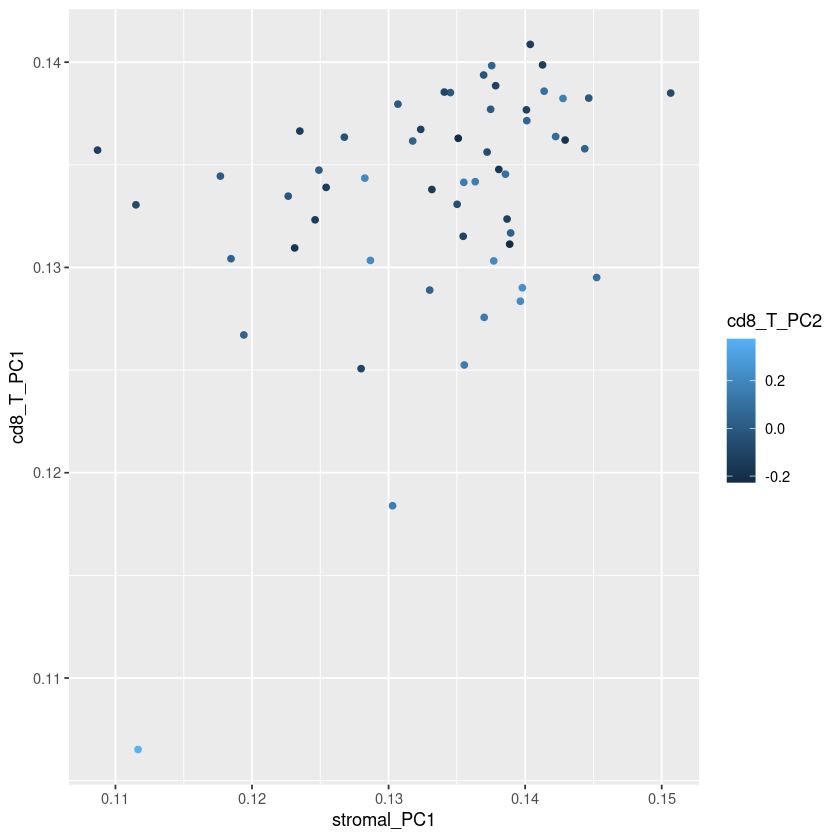

In [30]:
ggplot(data = df, aes(x=stromal_PC1, y=cd8_T_PC1, color=cd8_T_PC2)) + geom_point()